In [1]:
# colab gpu(tpu) 사용
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
%matplotlib inline

In [3]:
def imgshow(img):
  rows = 1
  cols = img.size(0)
  fig = plt.figure()
  for i, image in enumerate(img):
    image = image.squeeze()
    image = image/2+0.5
    image = image.numpy()
    fig.add_subplot(rows,cols,i+1)
    plt.imshow(image, cmap='gray')
  plt.show()

In [4]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
download_root = './MNIST_DATASET'

In [6]:
train_dataset = MNIST(download_root,transform=mnist_transform, train=True, download=True)

Extracting ./MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw


Extracting ./MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw


Extracting ./MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw


Extracting ./MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
num_epochs = 100
batch_size = 128
learning_rate = 1e-3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)

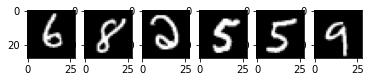

In [9]:
data_eval = next(iter(dataloader))
img = data_eval[0][:6]
imgshow(img)

In [10]:
class autoencoder(nn.Module):
  def __init__(self):
    super(autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(True),# inplace=True 로 하면 활성화 함수 이전 값을 이후 값으로 덧씌운다. 
        nn.Linear(128,64),
        nn.ReLU(True),
        nn.Linear(64,12),
        nn.ReLU(True),
        nn.Linear(12,3)
    )
    self.decoder = nn.Sequential(
        nn.Linear(3,12),
        nn.ReLU(True),
        nn.Linear(12,64),
        nn.ReLU(True),
        nn.Linear(64,128),
        nn.ReLU(True),
        nn.Linear(128,28*28),
        nn.Tanh()# 이미지가 -1~1사이의 값을 가지므로
    )
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [11]:
def evaluate(data):
  model.eval()
  with torch.no_grad():
    img = data[0][:6]
    mini = img.size(0)
    img = img.view(mini, -1).to(device)
    img = model(img.to(device))
    img = img.view(mini,28,28).to('cpu')
    imgshow(img)

In [12]:
model = autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=1e-5)
data = next(iter(dataloader)) # evaluate 하기 위한 데이터

epoch[ 1 / 100 ], loss:0.1979
epoch[ 2 / 100 ], loss:0.1682
epoch[ 3 / 100 ], loss:0.1612
epoch[ 4 / 100 ], loss:0.1479
epoch[ 5 / 100 ], loss:0.1439
epoch[ 6 / 100 ], loss:0.1505
epoch[ 7 / 100 ], loss:0.1492
epoch[ 8 / 100 ], loss:0.1461
epoch[ 9 / 100 ], loss:0.1453
epoch[ 10 / 100 ], loss:0.1395


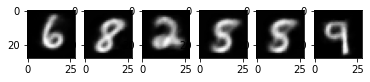

epoch[ 11 / 100 ], loss:0.1378
epoch[ 12 / 100 ], loss:0.1392
epoch[ 13 / 100 ], loss:0.1415
epoch[ 14 / 100 ], loss:0.1355
epoch[ 15 / 100 ], loss:0.1349
epoch[ 16 / 100 ], loss:0.1309
epoch[ 17 / 100 ], loss:0.1410
epoch[ 18 / 100 ], loss:0.1309
epoch[ 19 / 100 ], loss:0.1343
epoch[ 20 / 100 ], loss:0.1302


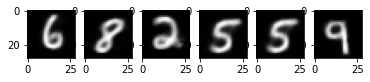

epoch[ 21 / 100 ], loss:0.1313
epoch[ 22 / 100 ], loss:0.1315
epoch[ 23 / 100 ], loss:0.1228
epoch[ 24 / 100 ], loss:0.1118
epoch[ 25 / 100 ], loss:0.1225
epoch[ 26 / 100 ], loss:0.1298
epoch[ 27 / 100 ], loss:0.1266
epoch[ 28 / 100 ], loss:0.1322
epoch[ 29 / 100 ], loss:0.1331
epoch[ 30 / 100 ], loss:0.1336


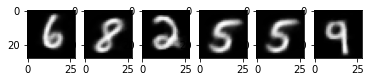

epoch[ 31 / 100 ], loss:0.1235
epoch[ 32 / 100 ], loss:0.1346
epoch[ 33 / 100 ], loss:0.1226
epoch[ 34 / 100 ], loss:0.1272
epoch[ 35 / 100 ], loss:0.1323
epoch[ 36 / 100 ], loss:0.1281
epoch[ 37 / 100 ], loss:0.1259
epoch[ 38 / 100 ], loss:0.1283
epoch[ 39 / 100 ], loss:0.1224
epoch[ 40 / 100 ], loss:0.1299


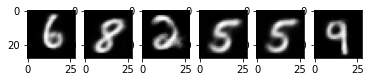

epoch[ 41 / 100 ], loss:0.1263
epoch[ 42 / 100 ], loss:0.1168
epoch[ 43 / 100 ], loss:0.1290
epoch[ 44 / 100 ], loss:0.1293
epoch[ 45 / 100 ], loss:0.1171
epoch[ 46 / 100 ], loss:0.1159
epoch[ 47 / 100 ], loss:0.1271
epoch[ 48 / 100 ], loss:0.1278
epoch[ 49 / 100 ], loss:0.1255
epoch[ 50 / 100 ], loss:0.1325


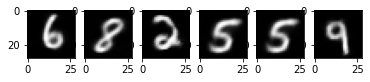

epoch[ 51 / 100 ], loss:0.1362
epoch[ 52 / 100 ], loss:0.1217
epoch[ 53 / 100 ], loss:0.1320
epoch[ 54 / 100 ], loss:0.1286
epoch[ 55 / 100 ], loss:0.1090
epoch[ 56 / 100 ], loss:0.1286
epoch[ 57 / 100 ], loss:0.1188
epoch[ 58 / 100 ], loss:0.1222
epoch[ 59 / 100 ], loss:0.1141
epoch[ 60 / 100 ], loss:0.1271


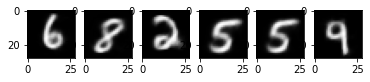

epoch[ 61 / 100 ], loss:0.1246
epoch[ 62 / 100 ], loss:0.1191
epoch[ 63 / 100 ], loss:0.1213
epoch[ 64 / 100 ], loss:0.1254
epoch[ 65 / 100 ], loss:0.1178
epoch[ 66 / 100 ], loss:0.1252
epoch[ 67 / 100 ], loss:0.1208
epoch[ 68 / 100 ], loss:0.1299
epoch[ 69 / 100 ], loss:0.1290
epoch[ 70 / 100 ], loss:0.1288


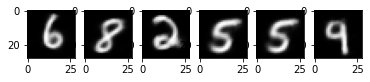

epoch[ 71 / 100 ], loss:0.1287
epoch[ 72 / 100 ], loss:0.1142
epoch[ 73 / 100 ], loss:0.1154
epoch[ 74 / 100 ], loss:0.1217
epoch[ 75 / 100 ], loss:0.1231
epoch[ 76 / 100 ], loss:0.1195
epoch[ 77 / 100 ], loss:0.1265
epoch[ 78 / 100 ], loss:0.1146
epoch[ 79 / 100 ], loss:0.1243
epoch[ 80 / 100 ], loss:0.1162


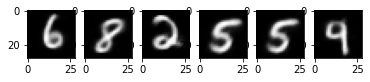

epoch[ 81 / 100 ], loss:0.1128
epoch[ 82 / 100 ], loss:0.1099
epoch[ 83 / 100 ], loss:0.1285
epoch[ 84 / 100 ], loss:0.1114
epoch[ 85 / 100 ], loss:0.1216
epoch[ 86 / 100 ], loss:0.1269
epoch[ 87 / 100 ], loss:0.1305
epoch[ 88 / 100 ], loss:0.1337
epoch[ 89 / 100 ], loss:0.1231
epoch[ 90 / 100 ], loss:0.1178


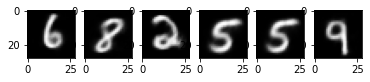

epoch[ 91 / 100 ], loss:0.1156
epoch[ 92 / 100 ], loss:0.1241
epoch[ 93 / 100 ], loss:0.1236
epoch[ 94 / 100 ], loss:0.1131
epoch[ 95 / 100 ], loss:0.1238
epoch[ 96 / 100 ], loss:0.1267
epoch[ 97 / 100 ], loss:0.1286
epoch[ 98 / 100 ], loss:0.1284
epoch[ 99 / 100 ], loss:0.1143
epoch[ 100 / 100 ], loss:0.1203


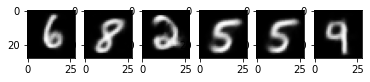

In [13]:
# 그래프 plot을 위한 리스트들
loss_y = []
loss_x = []
step = 0
for epoch in range(num_epochs):
  model.train()
  for data in dataloader:
    step+=1
    img, _ = data
    img = img.view(img.size(0), -1).to(device)
    # 순방향 전파
    output = model(img)
    loss = criterion(output, img)
    loss_y.append(loss.item())
    loss_x.append(step)
    # 역전파
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  # 한 epoch 마다 loss값 반환하기
  print('epoch[ {} / {} ], loss:{:.4f}'. format( epoch+1,num_epochs, loss.item() ) )
  if (epoch+1)%10 ==0:
    evaluate(data_eval)

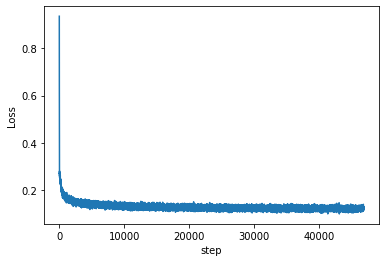

In [14]:
plt.plot(loss_x,loss_y)
plt.xlabel('step')
plt.ylabel('Loss')
plt.show()